# Tipos de arquitectura de Deep Learning

## Redes neuronales profundas:

- **Redes neuronales convolucionales (CNNs)**:
Se utilizan principalmente para tareas de visión artificial y procesamiento de imágenes.
Ejemplos: VGG16, ResNet, Inception V3, Xception, SqueezeNet.

- **Redes neuronales recurrentes (RNNs)**:
Se utilizan para tareas que involucran secuencias de datos, como el reconocimiento de voz, la traducción automática y la generación de texto.
Ejemplos: LSTM, GRU.

- **Redes neuronales convolucionales recurrentes (CRNNs):**
Combinan las características de las CNNs y las RNNs para tareas que involucran secuencias de datos con información espacial.
Ejemplos: ConvLSTM, CRNN.

## Redes neuronales no profundas:

- **Perceptrón multicapa (MLP)**

**Secuenciales y Funcionales**
 - secuenciales : (CNNs) y (RNNs)
 - funcionales : ResNets,
 

## Ejemplos (red neuronal perceptron)
- **Problema OR** : Queremos mostrar una neurona simple para que pueda aprender como se comporta una función.",

    - (1,0) ---> 1,
    - (0,1) ---> 1,
    - (0,0) ---> 0,
    
    Si ingresamos el valor (1,1) entonces debe predecir 1

La idea es que dada la función sigmoide $f(z)= \frac{1}{1+e^{-z}}$ se quiere predecir lo mejor posible los resultados
donde $z= \omega_1 x_1 +\omega_2x_2$.

Inicialmente los $\omega_i$ son aleatorios, pero a medida que se va iterando se ajusnta $w_i = w_i + ajuste$, donde 
$$ajuste = \langle y_{train}, || \hat{y}-y|| \Delta(\hat{y})\rangle$$

- output = $f(x_{train})= \dfrac{1}{1+e^{-(\omega_1 x_1 +\omega_2x_2)}}$ (un vector con las probabilidades de cada entrada)
- y_train es un vector con las salidas de los datos de entrenamiento



### A mano

In [ ]:
import numpy as np

class SigmoidNeuron():
    def __init__(self, n=2) -> None:
        np.random.seed(123)
        self.synaptic_weights = np.random.uniform(-1, 1, (n, 1))

    def __sigmoid(self, x):
        return 1/(1+np.exp(-x)) 

    def __sigmoide_derivate(self, x):
        return (x*(1-x))# Solo hacemos esto porque en la entrada de  la sigmoide derivada ya le entramos sigmode(x)

    ## Aplincando descenso de gradiente
    def train(self, trainging_input, training_output, iterations):
        for iteration in range(iterations):
            output = self.predict(trainging_input)
            error = training_output.reshape((len(trainging_input), 1)) - output

            adjustment = np.dot(trainging_input.T, error*self.__sigmoide_derivate(output))
            self.synaptic_weights += adjustment

    def predict(self, input):
      return self.__sigmoid(np.dot(input,self.synaptic_weights))

In [74]:
X_train = np.array([(1,0),(0,1),(0,0)])
y_train = np.array([1,1,0]).reshape(3,1)

In [76]:
#Inicializando Sigmoid Neuron
neuron = SigmoidNeuron(2)

# Pesos aleaotirios
neuron.synaptic_weights

epochs = 100

neuron.train(X_train,y_train,epochs)
print(f'Los nuevos pesos son\n {neuron.synaptic_weights}')

y_test = np.array((1,1))
print(f'El valor que predice la neurona para {y_test} es {neuron.predict(y_test)}')

Los nuevos pesos son
 [[2.43994978]
 [2.39996164]]
El valor que predice la neurona para [1 1] es [0.99215429]


## Usando tensorflow

In [77]:
import tensorflow as tf
import numpy as np

mlp_model = tf.keras.models.Sequential()
mlp_model.add(tf.keras.layers.Flatten())
for _ in range(1):
  mlp_model.add(tf.keras.layers.Dense(100,activation='sigmoid'))

In [97]:
# Compila el modelo
mlp_model.compile(
    optimizer=tf.optimizers.SGD(),
    loss='sparse_categorical_crossentropy',  # Especifica una función de pérdida adecuada
    metrics=['accuracy']
)

# Define tus datos de entrada y etiquetas
inputs = np.array([(0, 0), (1, 0), (0, 1)])
labels = np.array([0, 1, 1])

# Entrena el modelo
mlp_model.fit(inputs, labels, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step - accuracy: 0.6667 - loss: 3.1410
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6667 - loss: 3.1342
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6667 - loss: 3.1275
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6667 - loss: 3.1207
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6667 - loss: 3.1140
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6667 - loss: 3.1072
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6667 - loss: 3.1005
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6667 - loss: 3.0938
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6667 - loss: 3.0870
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6667 - loss: 3.0803
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6667 - loss: 3.0736
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6667 - l

In [93]:
test = np.array([[1,1]])
mlp_model.predict(test)

mlp_model.evaluate(inputs, labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 3.1410


3.1410248279571533

In [102]:
import tensorflow as tf
import numpy as np

# Define el modelo
mlp_model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(2,)),  # Capa de aplanamiento para convertir la entrada en un vector
    tf.keras.layers.Dense(100, activation='sigmoid'),  # Capa oculta con 100 neuronas y función de activación sigmoidal
    tf.keras.layers.Dense(1, activation='sigmoid')  # Capa de salida con una neurona y función de activación sigmoidal
])

# Compila el modelo con una tasa de aprendizaje ajustada
mlp_model.compile(
    optimizer=tf.optimizers.SGD(learning_rate=0.1), 
    loss='binary_crossentropy', 
    metrics=['accuracy']
)

# Define los datos de entrada y etiquetas
inputs = np.array([(0, 0), (1, 0), (0, 1)])
labels = np.array([0, 1, 1])

# Entrena el modelo durante más épocas para permitir una mejor convergencia
mlp_model.fit(inputs, labels, epochs=100)

# Evalúa el modelo
loss, accuracy = mlp_model.evaluate(inputs, labels)
print("Pérdida:", loss)
print("Precisión:", accuracy)

# Predice el punto (1,1)
prediction = mlp_model.predict(np.array([[1, 1]]))
print("Predicción para (1,1):", prediction)


Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step - accuracy: 0.3333 - loss: 0.7077
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6667 - loss: 0.6345
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6667 - loss: 0.6248
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6667 - loss: 0.6229
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6667 - loss: 0.6221
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6667 - loss: 0.6215
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6667 - loss: 0.6209
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6667 - loss: 0.6203
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6667 - loss: 0.6197
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6667 - loss: 0.6191
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6667 - loss: 0.6185
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy

## Ejemplo de red neuronal secuencial

<img src="images/secuencial.png" style="display: block; margin-left: auto; margin-right: auto;"> 

### Ejemplo

Labels: 0


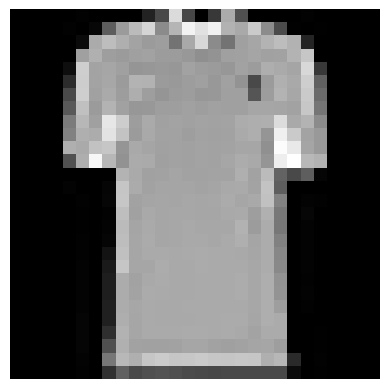

In [116]:
import matplotlib.pyplot as plt

fashion_mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) , (test_images,test_labels)  = fashion_mnist.load_data()

np.set_printoptions(linewidth=200)

img_index = 12454
plt.imshow(training_images[img_index],cmap='gray')
plt.axis(False)
print('Labels:', training_labels[img_index])

In [128]:
training_images = training_images/255
test_images = test_images/255

### creacion de modelo

In [130]:
mlp_model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256,activation='relu'),
  tf.keras.layers.Dense(10,activation='softmax'),
])

## compilacion
mlp_model.compile(
  optimizer = tf.optimizers.SGD(),
  loss = 'sparse_categorical_crossentropy',
  metrics = ['accuracy']
)

# ajuste de datos
mlp_model.fit(training_images,training_labels,epochs=15)

Epoch 1/15


2024-04-03 20:18:15.004022: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6882 - loss: 0.9792
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8270 - loss: 0.5168
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8425 - loss: 0.4658
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8490 - loss: 0.4397
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8576 - loss: 0.4194
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8605 - loss: 0.4057
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8652 - loss: 0.3967
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8660 - loss: 0.3841
Epoch 9/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8718 - loss: 0.3743
Epoch 10/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8739 - loss: 0.3640
Epoch 11/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8760 - loss: 0.3584
Epoch 12/15
1875/1875 ━━━━━━━━━━━━━━━━━━━

Notemos que tenemos la composición:  $\mathbb{R}^{784}\overset{f}{\longrightarrow}\mathbb{R}^{256}\overset{g}{\longrightarrow}\mathbb{R}^{10}$

784 = 28*28

donde tengo en la primera capa oculta:

- 784 x 256 = 200960  $\omega_i$
- 256 $b_i$ 

Y en la capa de salida

- 256*10 = 2560 $\omega_i$
- 10 $b_i$

In [146]:
mlp_model.summary()

Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_22 (Flatten)            │ (32, 784)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_262 (Dense)               │ (32, 256)              │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_263 (Dense)               │ (32, 10)               │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 203,532 (795.05 KB)

 Trainable params: 203,530 (795.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [131]:
## evaluar
 
mlp_model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8659 - loss: 0.3830


[0.3912621736526489, 0.8615000247955322]

Label Real es: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Label estimado es 2


array([[3.0291602e-02, 3.2079042e-05, 4.9492332e-01, 1.0519947e-03, 9.6067768e-03, 4.0882830e-10, 4.6374753e-01, 8.0829050e-12, 3.4663329e-04, 4.3346386e-11]], dtype=float32)

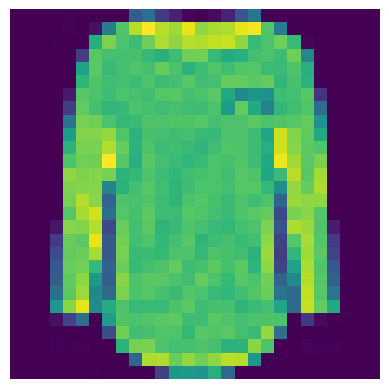

In [167]:
import random
test_index = random.randint(0,999)
plt.imshow(test_images[test_index],cmap='viridis')
plt.axis(False)

print('Label Real es:', test_labels[test_index])
input_image = np.reshape(test_images[test_index],(1,784))

prediction = mlp_model.predict(np.array([test_images[test_index]], dtype=np.float32)) ## Ya que la neurona de salida e softmax retorna un vector de probabilidades
print('Label estimado es', np.argmax(prediction))
prediction


## Ejemplo de red neuronal convolucional

<center>
<img src='./images/convolucion.png'>
</center>

/tmp/ipykernel_81808/2271676461.py:7: DeprecationWarning: scipy.misc.ascent has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.ascent instead.
  img = misc.ascent()


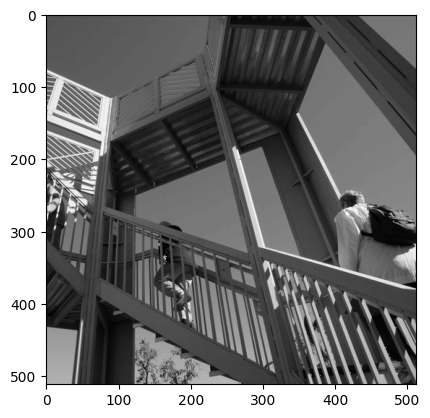

In [172]:
import numpy as np
from scipy import misc 
import matplotlib.pyplot as plt

#Cargar una imagen de prueba 

img = misc.ascent()

plt.imshow(img, cmap='gray')
plt.grid(False)
plt.show()


In [173]:
img_transformated = np.copy(img)
size_x , size_y = img_transformated.shape

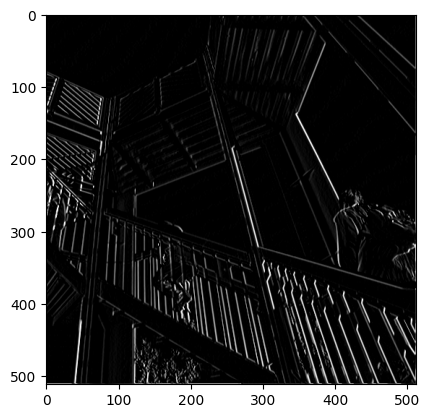

In [178]:
#Luminosidad
filter = [
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
]

#Aproximaxión de la derivada respecto a un eje (las derivadas devuelven bordes)
filter = [
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]
]
weight = 1/2

for x in range(1, size_x-1):
    for y in range(1, size_y-1):
        convolution = 0.0
        convolution = convolution + (img[x-1, y-1]*filter[0][0])
        convolution = convolution + (img[x, y-1]*filter[0][1])
        convolution = convolution + (img[x+1, y-1]*filter[0][2])
        convolution = convolution + (img[x-1, y]*filter[1][0])
        convolution = convolution + (img[x, y]*filter[1][1])
        convolution = convolution + (img[x+1, y]*filter[1][2])
        convolution = convolution + (img[x-1, y+1]*filter[2][0])
        convolution = convolution + (img[x, y+1]*filter[2][1])
        convolution = convolution + (img[x+1, y+1]*filter[2][2])
        convolution = convolution*weight

        if convolution<0:
          convolution=0
        if convolution>255:
          convolution=255

        img_transformated[x,y] = convolution

plt.imshow(img_transformated,cmap='gray')
plt.grid(False)
plt.show()

### Recreación de la capa Yann Le Cun

In [182]:
training_images.shape

cnn_model = tf.keras.models.Sequential(
  [

# Primera Conv Layer + subsampling
tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28,1)),
tf.keras.layers.MaxPool2D(2, 2),
# Segunda Conv Layer + subsampling
tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
tf.keras.layers.MaxPool2D(2, 2),
# Tercera layer (flatten)(estirar en un vector)
tf.keras.layers.Flatten(),
# Cuarta layer (dense)
tf.keras.layers.Dense(128, activation='relu'),
# Quinta layer (output)
tf.keras.layers.Dense(10, activation='softmax')
  ]
)


## compile model
cnn_model.compile(
  optimizer=tf.keras.optimizers.SGD(),
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy']
)

cnn_model.fit(training_images,training_labels,epochs=2)

/home/pc/Documentos/quipux/induccion/plan_formacion/env/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/2


2024-04-03 20:56:29.944349: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 20ms/step - accuracy: 0.5674 - loss: 1.2606
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.7841 - loss: 0.5676


Label Real es: 8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Label estimado es 8


array([[5.4530413e-03, 3.4365570e-04, 5.5239433e-03, 1.6960452e-03, 3.9578644e-03, 6.2988652e-03, 1.1517279e-02, 4.6089152e-03, 9.5816600e-01, 2.4343892e-03]], dtype=float32)

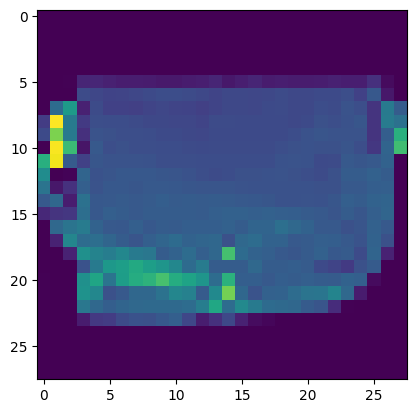

In [183]:
import random
test_index = random.randint(0,999)
plt.imshow(test_images[test_index],cmap='viridis')


print('Label Real es:', test_labels[test_index])
input_image = np.reshape(test_images[test_index],(1,28,28,1))

prediction = cnn_model.predict(np.array([test_images[test_index]], dtype=np.float32)) ## Ya que la neurona de salida e softmax retorna un vector de probabilidades
print('Label estimado es', np.argmax(prediction))
prediction

# Transformers
 next...

# Arquitecturas para la clasificacion de imagenes
ganadoras de el concurso de reconocimiento visual a gran escala ImageNet (ILSVRC) [

- VGGNet (finalista en 2014)
- GoogleNet o Inception (ganadora 2014)
- ResNet (ganadora 2015)

# Arquitecturas de reconocimiento de objetos

**Algoritmos de dos fases** :
 - - **primera fase** generar un conjunto de posibles rectángulos delimitadores o
propuesta de región de interés, esto quiere decir que devuelven regiones que
contienen posibles candidatos a ser un objeto que se desea detectar 

 - - **la segunda fase** 
consiste en utilizar redes neuronales convolucionales para asignar las clases
pertinentes a cada objeto que aparece en la imagen. Ejemplos de algoritmos de
dos fases son: R-CNN, Fast R-CNN y Faster R-CNN.


**Algoritmmos de una fase**
 - - divide la imagen en una
cuadricula, posteriormente cada celda de la cuadricula pasan a una red
convolucional, si el centro de un objeto cae en una celda de cuadrícula, esa celda
de cuadrícula es responsable de detectar ese objeto. Ejemplos de algoritmos de
una fase: SSD y YOLO.


# Frameworks deel learning

- Scikit-learn
- Darknet (corre en CUDA)
- OpenCV